# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
import matplotlib.pyplot as plt
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


# #1.
Is the distribution of body temperatures normal?

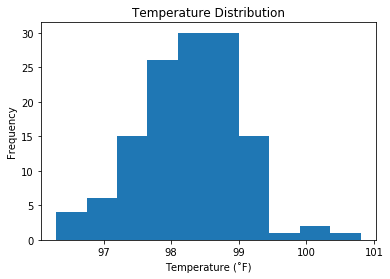

In [29]:
plt.hist(df.temperature)
plt.ylabel('Frequency')
plt.xlabel('Temperature (˚F)')
plt.title('Temperature Distribution')
plt.show()

Based on this plot, the termpareture appears to be relatively normally distributed, but with a right tail.

# #2.
Is the sample size large? Are the observations independent?

In [5]:
len(df)

130

This is a relatively small sample size. The observations are independent because the temperature one person is independent of the temperature of another person.

# #3.
Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

$H_0$: sample mean is 98.6˚

$H_A$: sample mean is not 98.6˚

significance level: 5%

test statistic: temperature (˚F)

In [7]:
print('The mean temperature of this dataset is', df.temperature.mean())

The mean temperature of this dataset is 98.24923076923078


In [8]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [9]:
bs_replicates = draw_bs_reps(df.temperature, np.mean, 10000)
bs_replicates.mean()

98.2486463076923

In [10]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([98.12307692, 98.37384615])

98.6˚ is not in the confidence interval of the bootstrap sample

We want to use a one sample $t$-test because our data is a subset of the true population. We use $t$ because we want to know if the population mean of 98.6 is represented by our dataset, where $z$ is used for the true population

In [11]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Based on the 1 sample $t$-test, the true population mean is not  98.6˚

In [25]:
sm.stats.ztest(df.temperature, value = 98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

The results are different because the $t$-test is meant for samples, where the $z$-test is meant for the population. 

# #4.
Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

In [28]:
a = np.random.choice(df.temperature, 10)
print('t-test:', stats.ttest_1samp(a, 98.6))
print('z-test:', sm.stats.ztest(a, value = 98.6))

t-test: Ttest_1sampResult(statistic=-0.8257228238447237, pvalue=0.4303049715830267)
z-test: (-0.8257228238447237, 0.40896134203690104)


The $t$ test is the correct test to use because we are dealing with a very small sample of the true population. The $t$ and $z$ test results are similar, but the $t$ test results are slightly higher than the $z$ test.

# #5.
At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

confidence interval: 99%

margin of error: 1%

In [31]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [33]:
bootstrap = np.empty(10000)
for i in range (10000):
    bootstrap[i] = np.random.normal(df.temperature.mean(), df.temperature.std(), 1)

In [35]:
conf_int = np.percentile(bootstrap, [0.5, 99.5])
conf_int

array([ 96.36867528, 100.1335428 ])

In [36]:
conf_int = np.percentile(df.temperature, [0.5, 99.5])
conf_int

array([ 96.3645, 100.284 ])

The frequentist method has a slightly larger range than the bootstrap model. 

# #6
Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

In [43]:
male = df.loc[df.gender == 'M']['temperature']
female = df.loc[df.gender == 'F']['temperature']

print('Mean temperature of males:', male.mean())
print('Mean temperature of females:', female.mean())

Mean temperature of males: 98.1046153846154
Mean temperature of females: 98.39384615384613


In [46]:
stats.ttest_ind(male, female)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

Based on the two sample $t$-test with a confidence interval of 95%, the mean temperature of males and females is not statistically significantly different. 